In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [29]:
# Case 1: Prediction in RGB Color Space

In [30]:
# Model initializing
model = models.Sequential()

In [31]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data1/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [32]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

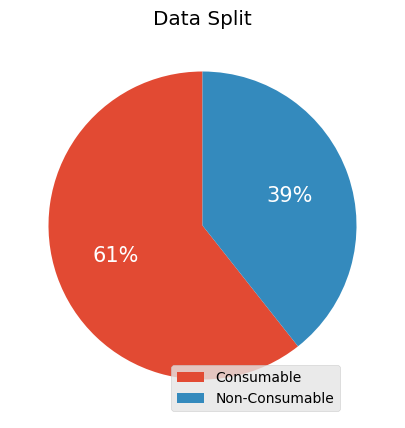

In [33]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [34]:
width = 100
height = 100
# Making standard size for the different class
sample_size = 122

In [35]:
# Converting BGR Images to RGB Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 37.909


In [36]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(244, 100, 100, 3)

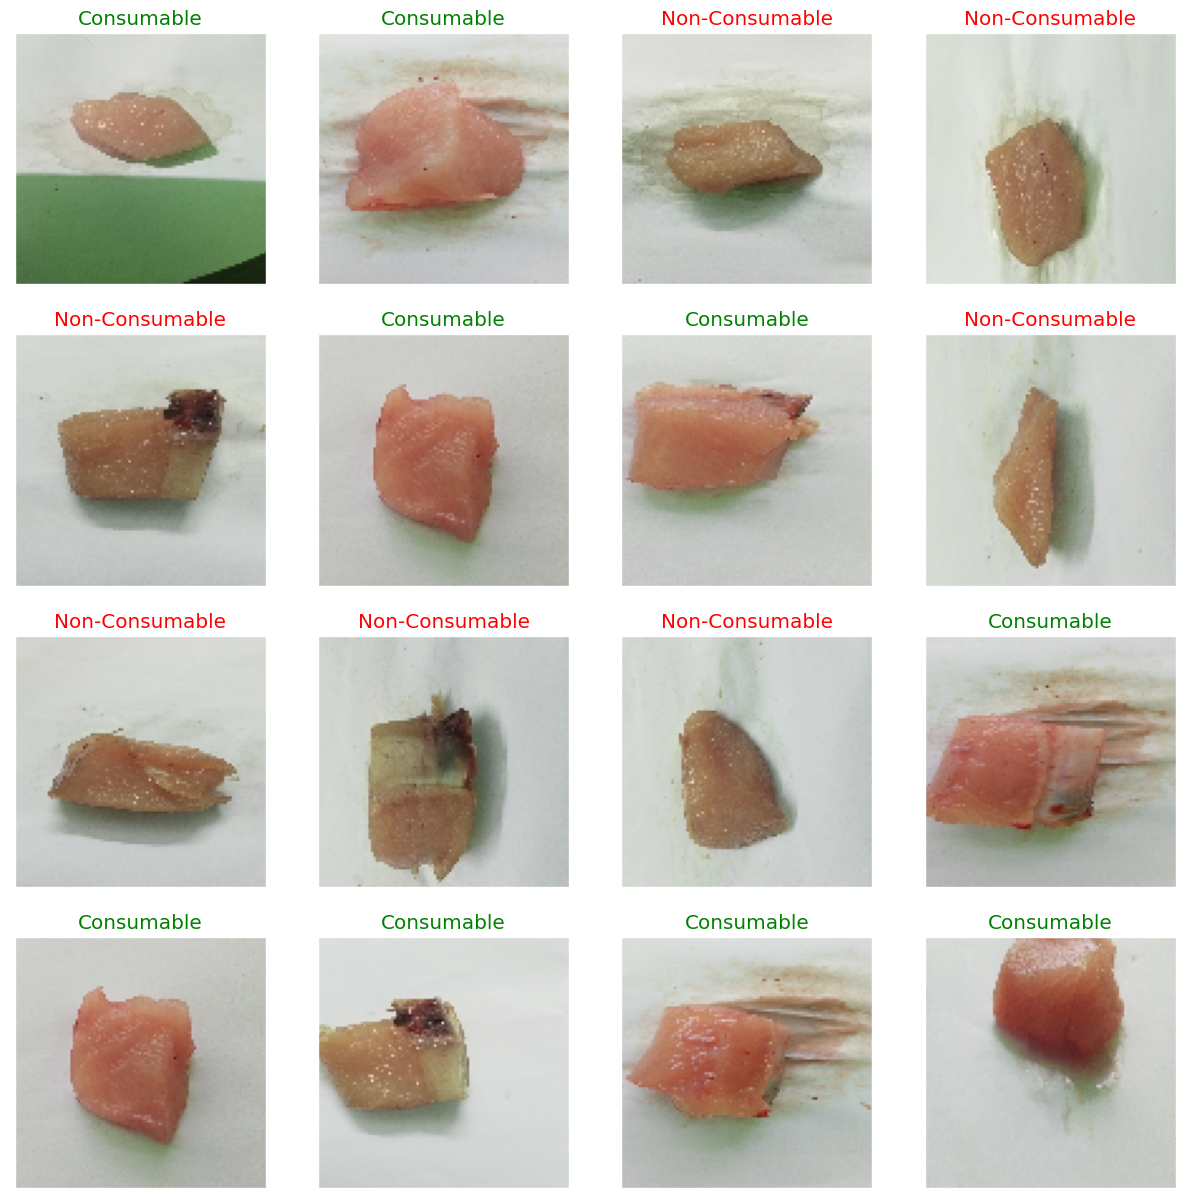

In [37]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [38]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [39]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 255.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [40]:
# Preparing the model
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [41]:
# Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
6/6 [==============================] - 3s 352ms/step - loss: 1.1410 - accuracy: 0.5235 - val_loss: 0.6861 - val_accuracy: 0.5270
Epoch 2/10
6/6 [==============================] - 2s 317ms/step - loss: 0.6895 - accuracy: 0.5235 - val_loss: 0.6967 - val_accuracy: 0.4730
Epoch 3/10
6/6 [==============================] - 2s 347ms/step - loss: 0.6726 - accuracy: 0.6294 - val_loss: 0.6598 - val_accuracy: 0.6757
Epoch 4/10
6/6 [==============================] - 2s 333ms/step - loss: 0.6315 - accuracy: 0.6765 - val_loss: 0.6312 - val_accuracy: 0.6216
Epoch 5/10
6/6 [==============================] - 2s 343ms/step - loss: 0.6131 - accuracy: 0.6412 - val_loss: 0.6433 - val_accuracy: 0.6622
Epoch 6/10
6/6 [==============================] - 2s 345ms/step - loss: 0.6156 - accuracy: 0.6176 - val_loss: 0.6081 - val_accuracy: 0.6351
Epoch 7/10
6/6 [==============================] - 2s 417ms/step - loss: 0.5676 - accuracy: 0.7471 - val_loss: 0.5864 - val_accuracy: 0.7027
Epoch 8/10
6/6 [====

3/3 - 0s - loss: 0.4792 - accuracy: 0.7297 - 226ms/epoch - 75ms/step


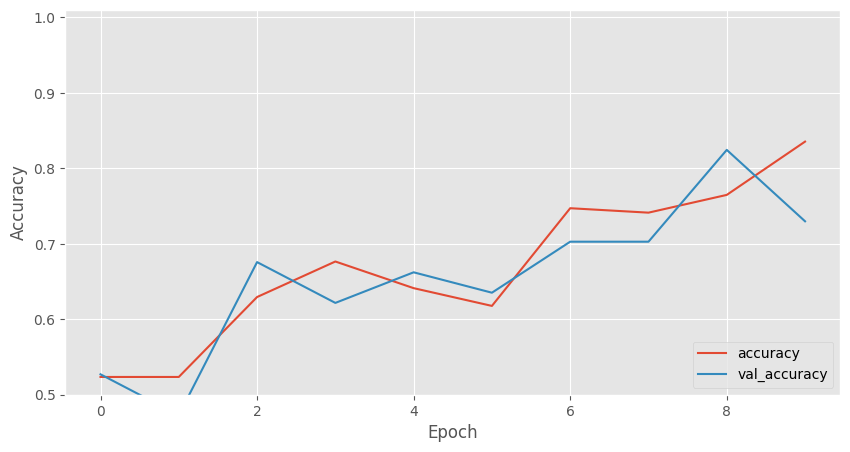

In [42]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [43]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 63ms/step - loss: 0.4792 - accuracy: 0.7297


In [44]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.4792267978191376
accuracy : 0.7297297120094299


3/3 [==============================] - 0s 68ms/step


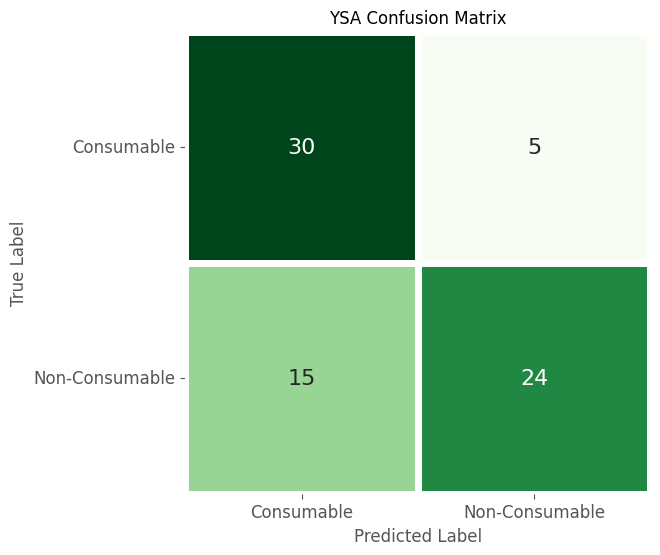

In [45]:
# Calculating Accuracy

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [46]:
# Case 2: Prediction in HSV Color Space

In [47]:
# Model initializing
model = models.Sequential()

In [48]:
# Preparing the dataset
files = ['Consumable', 'Non-Consumable']
address = '/media/debrc/Data1/Codings/Meat-Gradation-PROJ/Dataset/Chicken/'

In [49]:
# Loading the image files based on classifications
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(address+col)
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

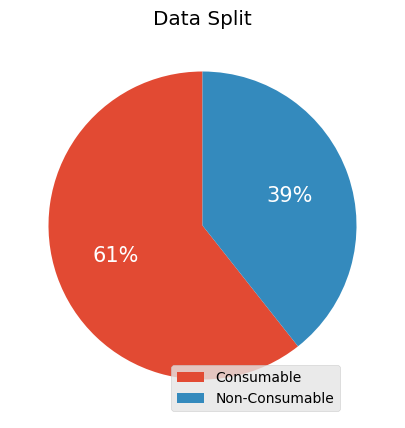

In [50]:
sizes = [len(data['Consumable']), len(data['Non-Consumable'])]
plt.figure(figsize=(10,5), dpi=100)
plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90)
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [51]:
width = 100
height = 100
# Making standard size for the different class
sample_size = 122

In [52]:
# Converting BGR Images to HSV Color Space
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(address+title)
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
calculate_time = time.time() - start    
print("Calculate Time",round(calculate_time,5))

Calculate Time 38.19213


In [53]:
# Displaying the dimensionality of the array
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(244, 100, 100, 3)

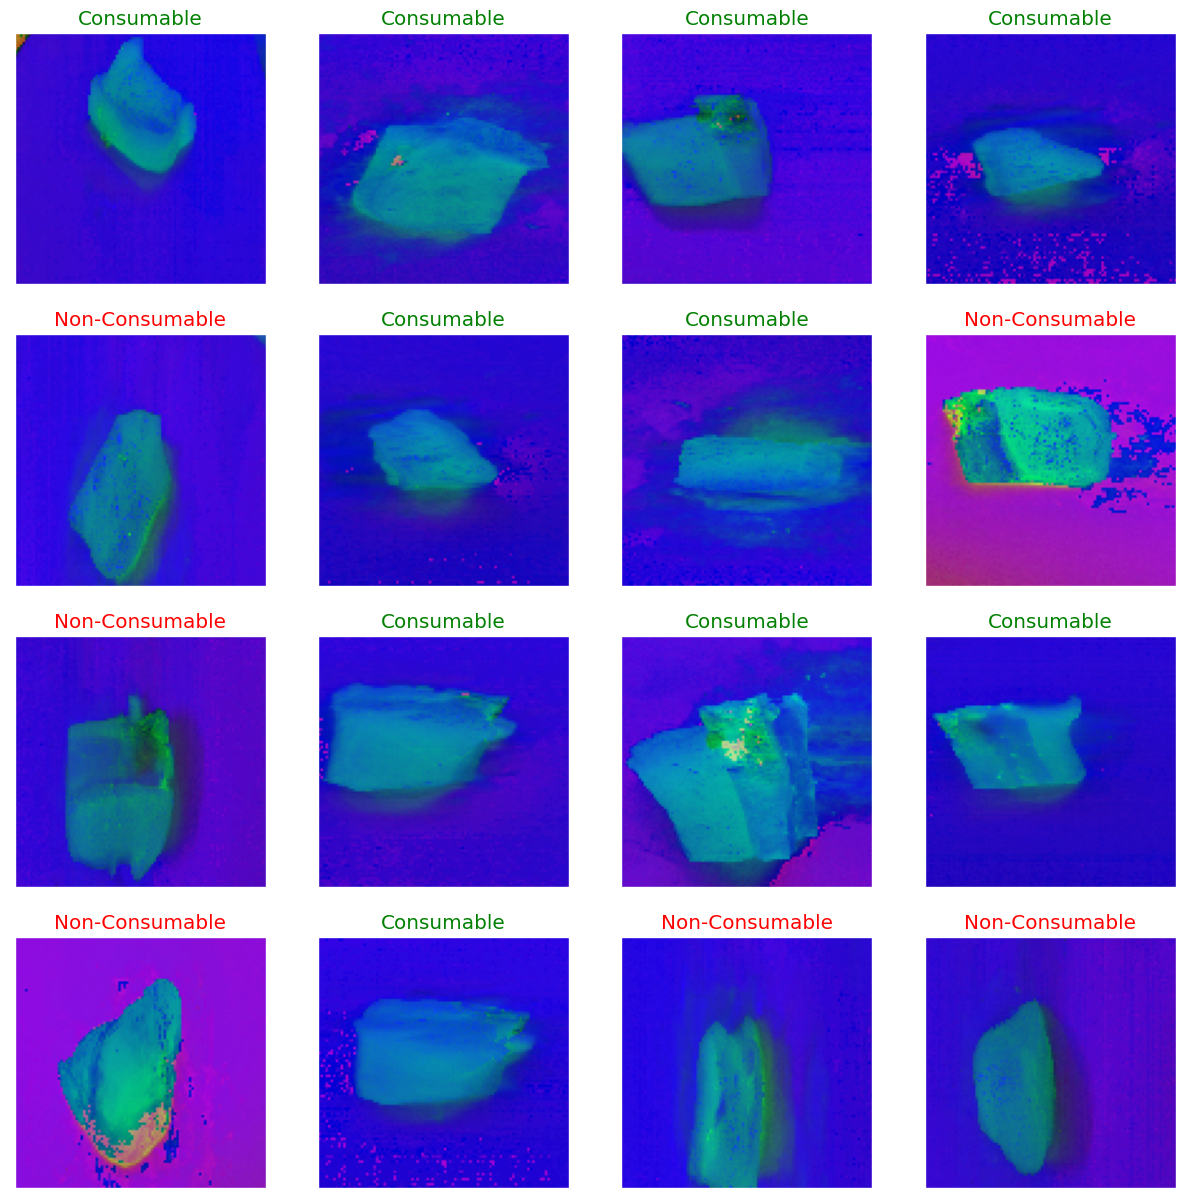

In [54]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Consumable':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [55]:
# Making labels for the data
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [56]:
# Transforming image_data rgb values within 0 to 1
X = image_data / 360.0
# Transforming labels to distinct integer values
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [57]:
# Preparing the model
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [58]:
# Training model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
6/6 [==============================] - 4s 437ms/step - loss: 0.8996 - accuracy: 0.5235 - val_loss: 0.6917 - val_accuracy: 0.5270
Epoch 2/10
6/6 [==============================] - 2s 404ms/step - loss: 0.6975 - accuracy: 0.4882 - val_loss: 0.6742 - val_accuracy: 0.5270
Epoch 3/10
6/6 [==============================] - 2s 379ms/step - loss: 0.6718 - accuracy: 0.5118 - val_loss: 0.6329 - val_accuracy: 0.8514
Epoch 4/10
6/6 [==============================] - 3s 463ms/step - loss: 0.6512 - accuracy: 0.6765 - val_loss: 0.5644 - val_accuracy: 0.6351
Epoch 5/10
6/6 [==============================] - 3s 431ms/step - loss: 0.5636 - accuracy: 0.7412 - val_loss: 0.4907 - val_accuracy: 0.8649
Epoch 6/10
6/6 [==============================] - 2s 391ms/step - loss: 0.5052 - accuracy: 0.7824 - val_loss: 0.4612 - val_accuracy: 0.7838
Epoch 7/10
6/6 [==============================] - 2s 364ms/step - loss: 0.4938 - accuracy: 0.7353 - val_loss: 0.4794 - val_accuracy: 0.7568
Epoch 8/10
6/6 [====

3/3 - 0s - loss: 0.3488 - accuracy: 0.8243 - 287ms/epoch - 96ms/step


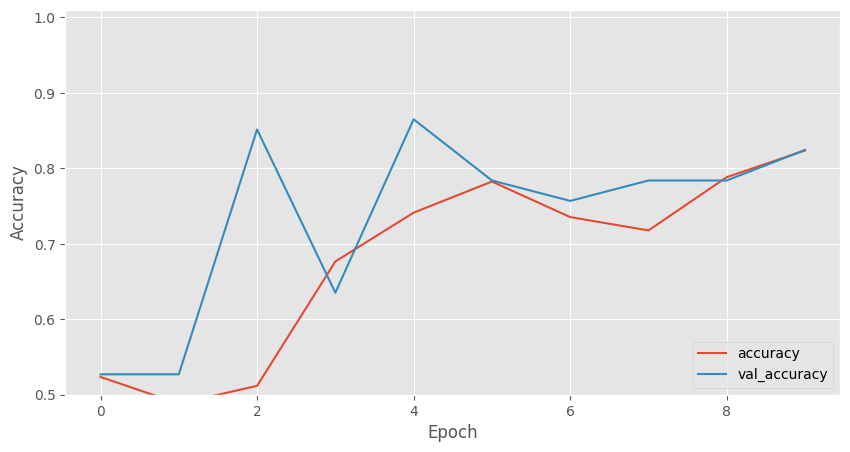

In [59]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [60]:
result=model.evaluate(test_images, test_labels)

3/3 [==============================] - 0s 65ms/step - loss: 0.3488 - accuracy: 0.8243


In [61]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.34883466362953186
accuracy : 0.8243243098258972


3/3 [==============================] - 0s 87ms/step


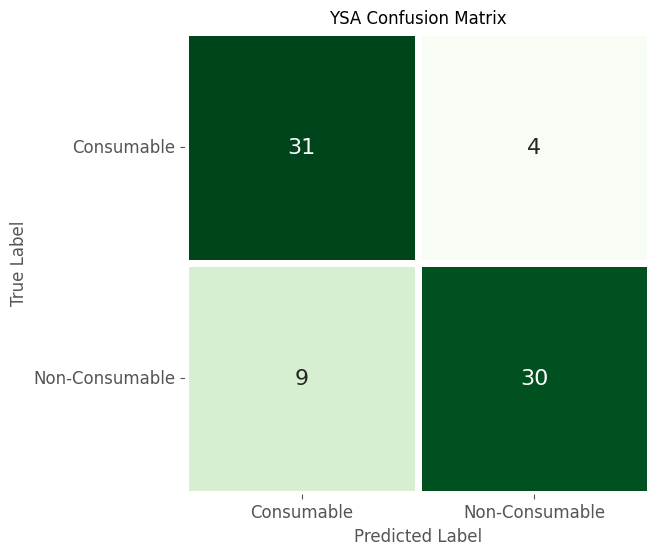

In [62]:
# Calculating Accuracy

y_pred = model.predict(test_images)

def toClass(pred):
    
    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index
        
    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Consumable","Non-Consumable"], index= ["Consumable","Non-Consumable"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()